<a href="https://colab.research.google.com/github/Gise05624/Proyecto_DataScience_I/blob/main/Entrega_1/%20pv_scania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
url = "https://raw.githubusercontent.com/Gise05624/Proyecto_DataScience_I/refs/heads/main/Entrega_1/dataset_pv_scania.csv"
df = pd.read_csv(url)

df.head()

,ID_Camion,Fecha_Entrada_Taller,Kilometraje,Tipo_Servicio,Repuestos_Requeridos,Costo_Repuestos,Costo_Mano_Obra,Duracion_Taller_Dias,Taller_ID,Ciudad_Taller,...,Año_Fabricacion,Presupuesto_Aprobado,Fecha_Salida_Taller,Cliente_ID,Frecuencia_Visitas_Taller,Tiempo_Espera_Dias,Tecnico_Asignado,Tipo_Repuesto_Mayor,Reclamos_Previos,Satisfaccion_Cliente
0,SCANIA-1000,2023-01-01,171958,Reparación,8,1123.64,3788.96,9,TLR002,Antofagasta,...,2020,NaN,2023-01-05,CLT-745,5,1,TEC-19,Frenos,3,2.0
1,SCANIA-1001,2023-01-02,721155,Diagnóstico,2,1852.78,3691.01,7,TLR003,NaN,...,2016,True,2023-01-06,CLT-824,5,0,TEC-12,Frenos,0,NaN
2,SCANIA-1002,2023-01-03,181932,Mantenimiento,2,2625.82,4393.34,6,TLR002,Valparaíso,...,2020,False,2023-01-07,CLT-626,8,2,TEC-11,Frenos,0,3.0
3,SCANIA-1003,2023-01-04,415838,Diagnóstico,3,1502.06,3641.64,12,TLR001,Valparaíso,...,2020,True,2023-01-08,CLT-535,4,7,TEC-16,Eléctrico,4,4.0
4,SCANIA-1004,2023-01-05,309178,Reparación,3,2101.09,1236.02,5,TLR003,Santiago,...,2017,False,2023-01-09,CLT-939,9,7,TEC-5,Frenos,3,4.0


# 1er Grafico con sns
Tipos de Servicio por Ciudad del Taller

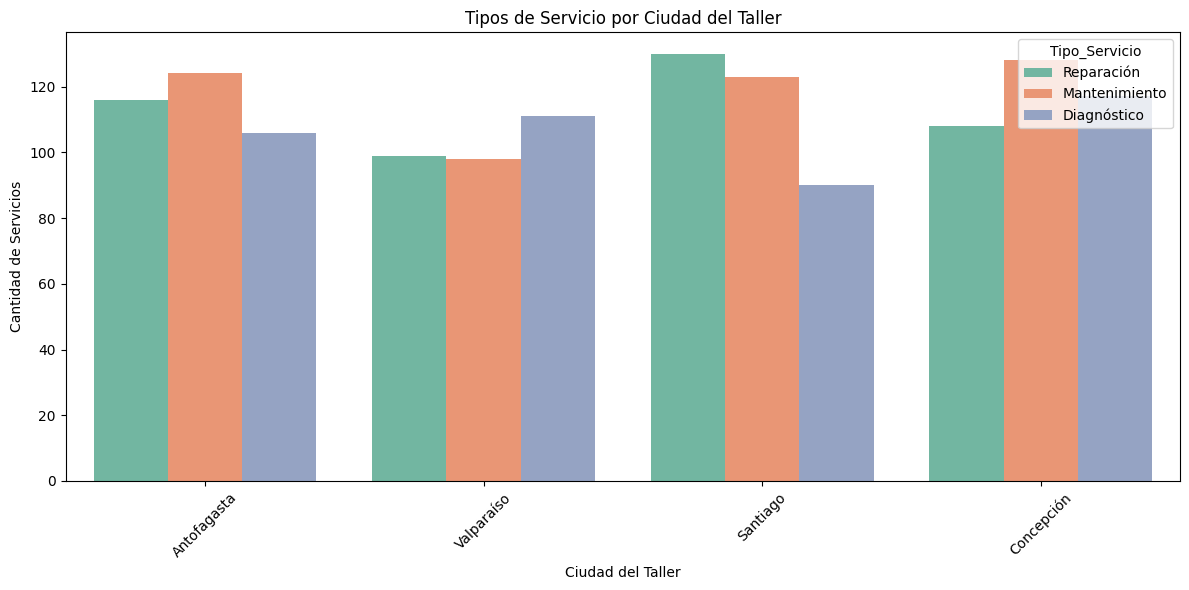

In [14]:
df_viz = df.dropna(subset=['Ciudad_Taller', 'Tipo_Servicio'])

plt.figure(figsize=(12, 6))
sns.countplot(data=df_viz, x='Ciudad_Taller', hue='Tipo_Servicio', palette='Set2')
plt.title('Tipos de Servicio por Ciudad del Taller')
plt.xlabel('Ciudad del Taller')
plt.ylabel('Cantidad de Servicios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2do grafico con sns

Ingresos al Taller por Mes

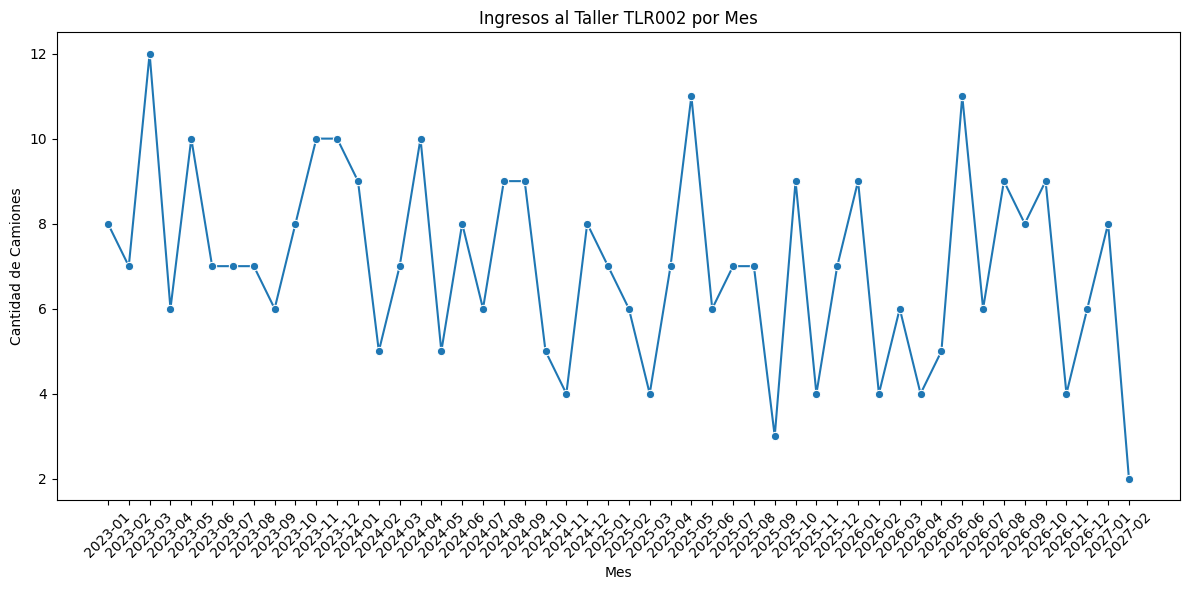

In [17]:
taller_filtrado = "TLR002"

df_taller = df.dropna(subset=['Fecha_Entrada_Taller', 'ID_Camion', 'Taller_ID'])
df_taller = df_taller[df_taller['Taller_ID'] == taller_filtrado]

df_taller['Fecha_Entrada_Taller'] = pd.to_datetime(df_taller['Fecha_Entrada_Taller'])
df_taller['Mes_Entrada'] = df_taller['Fecha_Entrada_Taller'].dt.to_period('M').astype(str)

visitas_por_mes = df_taller.groupby('Mes_Entrada')['ID_Camion'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=visitas_por_mes, x='Mes_Entrada', y='ID_Camion', marker='o')
plt.title(f'Ingresos al Taller {taller_filtrado} por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Camiones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()